In [2]:
!git add portfolio.ipynb

In [3]:
!git commit -m "Add portfolio notebook"


[main cd8ab12] Add portfolio notebook
 1 file changed, 25 insertions(+), 12 deletions(-)


In [4]:
print("Cartogis portfolio of Lauri Levomäki")

Cartogis portfolio of Lauri Levomäki


TESTI TESTI TESTI

In [9]:
print("KOKEILUA")

KOKEILUA


In [17]:
!pip install geopandas
!pip install osmnx
!pip install contextily


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/ba/f40c12e2a6b4a106ab16b1adfee2bf0aa6c27aaa72f928bf52b71734f9d8/fiona-1.9.6-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.5 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 330.4 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https:/

   uid                        geometry
0   91  POINT (373980.451 6673124.713)
Number of rows in our dataset: 3194
   uid                        geometry
0   91  POINT (373980.451 6673124.713)
Columns in the dataset: Index(['uid', 'geometry'], dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   uid       3194 non-null   int64   
 1   geometry  3194 non-null   geometry
dtypes: geometry(1), int64(1)
memory usage: 50.0 KB
None
Map saved to: C:\Users\lauri\Downloads\final_portfolio\MyMap_happypoints\happy_places_map.png


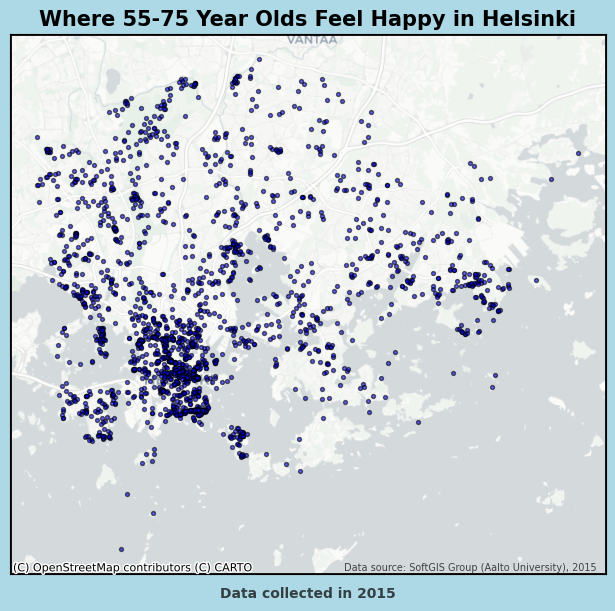

In [18]:
import geopandas as gpd
import pathlib
import osmnx
import contextily
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Path to our Experience data from Helsinki
NOTEBOOK_PATH = pathlib.Path().resolve()

# We will export the final map here,
# let’s also prepare an output directory for it:
DATA_DIRECTORY = NOTEBOOK_PATH / 'data'
MAP_DIRECTORY = NOTEBOOK_PATH / "MyMap_happypoints"
MAP_DIRECTORY.mkdir(exist_ok=True)
file_path = DATA_DIRECTORY / 'happypoints/happy_points.shp'

# Read the data as a GeoDataFrame named exp_places
exp_places = gpd.read_file(file_path)
print(exp_places.head(1))
print(f"Number of rows in our dataset: {len(exp_places)}")

# Print the first row of the dataset to see a sample of the data
print(exp_places.head(1))

# Print the column names
print("Columns in the dataset:", exp_places.columns)

# Print a summary of the GeoDataFrame to get more details about the data
print(exp_places.info())

PLACE_NAME = "Helsinki, Finland"
helsinki_area = osmnx.geocode_to_gdf(PLACE_NAME)

# Get the polygon to the same CRS as original data
helsinki_area = helsinki_area.to_crs(exp_places.crs)

# Ensure CRS match
assert exp_places.crs == helsinki_area.crs, "CRS do not match"

# Spatial join to extract points within the polygon
points_in_helsinki = gpd.sjoin(exp_places, helsinki_area, how="inner", predicate='within')

# Adding a basemap
points_to_vis = points_in_helsinki.to_crs("EPSG:3857")

# Create the figure and axis objects
fig, ax = plt.subplots()

# Fill the outer area with a neutral color
fig.patch.set_facecolor('#ADD8E6')

# Plotting with a larger marker size and contrasting color
points_to_vis.plot(ax=ax, markersize=8, color='blue', legend=True, alpha=0.6, edgecolor='black')

# Adding the OpenStreetMap Carto basemap
contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron)

# Add main title
main_title_text = 'Where 55-75 Year Olds Feel Happy in Helsinki'
ax.set_title(main_title_text, fontsize=15, weight='bold')

# Add data source attribution
attribution_text = "Data source: SoftGIS Group (Aalto University), 2015 "
ax.text(0.99, 0.002, attribution_text, transform=ax.transAxes, fontsize=7,
        verticalalignment='bottom', horizontalalignment='right', color='black', alpha=0.7)

# Add second title styled similarly to the main title
second_title_text = "Data collected in 2015"
ax.text(0.5, -0.05, second_title_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='center', color='black', alpha=0.7, fontweight='bold')

# Remove ticks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Set this to off if you want to remove the frame
ax.axis('on')

# Add a black frame
rect = Rectangle((0, 0), 1, 1, transform=ax.transAxes, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# Adjust figure size and modify only left and right margins
fig.set_size_inches(12, 6)  # Increase width only
fig.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05)  # Keep top and bottom as they were

# Save the map
map_file_path = MAP_DIRECTORY / 'happy_places_map.png'
fig.savefig(map_file_path, bbox_inches='tight', pad_inches=0.1)
print(f"Map saved to: {map_file_path}")

In [46]:
# This push changes to Github page

!git add .
!git commit -m "Description of your changes"
!git push origin main


[main acf9efe] Description of your changes
 1 file changed, 5 insertions(+), 6 deletions(-)


To https://github.com/levolak/cartogis-portfolio.git
   6e39994..acf9efe  main -> main


In [28]:
!git push origin main


Everything up-to-date
